In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
import librosa
from librosa import display
from sklearn.preprocessing import StandardScaler

data, sampling_rate = librosa.load('/content/drive/MyDrive/ColabNotebooks/dataset/Actor_01/03-01-01-01-01-01-01.wav')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


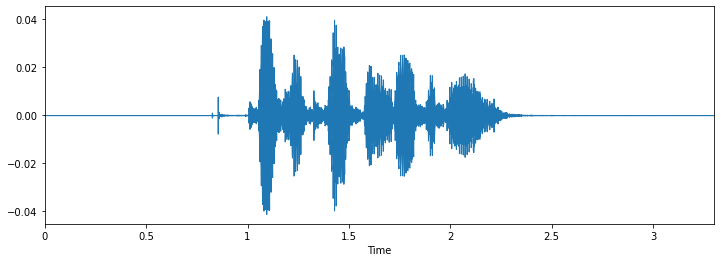

In [ ]:
% pylab inline
import os
import pandas as pd
import glob 
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
path = '/content/drive/MyDrive/ColabNotebooks/dataset'
lst = []

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mfcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) #mfccs extracted per file
        file = file[6:8] #extract features
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue       

In [ ]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)

#X = mfccs
#y = labels;

In [ ]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)


X.shape, y.shape

((2913, 40), (2913,))

In [ ]:
#preprocessing, basically preprocessing means that the datas are formatted and processed in a way that they will become usefull for the machine learning model,
#also part of the preprocessing consists in "garbage in, garbage out" a good sample of data is better than having bad datas even if the model it's the best that we can find
#in this case we don't need to garbage out anyhting.
#The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of your algorithm.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler.fit(X)
#Standardize features, scaling to unit variance
X = scaler.transform(X) #preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) #splitting for training and testing

# K-MEANS

#### Trying to get a data visualization before K-means

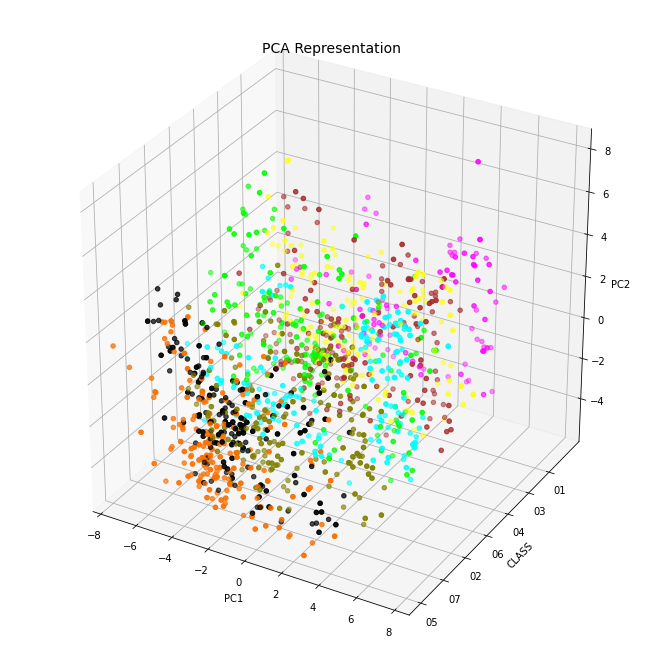

In [ ]:
#Trying to visualize the data, it has a shape of (1951,40) I need to reduce it
#visualize data in 3D with PCA dimensionality reduction 

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

#Try to get a better visualization with 2dimensionsn as components
from mpl_toolkits.mplot3d import Axes3D

pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_train)

fig = plt.figure(figsize=(9,9))
axes = Axes3D(fig)
axes.set_title('PCA Representation', size=14)
axes.set_xlabel('PC1')
axes.set_ylabel('CLASS')
axes.set_zlabel('PC2')

#use datafram to split the 2 principalComponents
DataVisualizationDF = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#need to create a list of colors, 1 color for each different class
colors = []
for c in y_train:
  if c == '01':#neutral
    colors.append('#FF00FF')
  elif c == '02':#calm
    colors.append('#00FFFF')
  elif c == '03':#happy
    colors.append('#FFFF14')
  elif c == '04':#sad
    colors.append('#A52A2A')
  elif c == '05':#angry
    colors.append('#000000')
  elif c == '06':#fearful
    colors.append('#00FF00')
  elif c == '07':#disgust
    colors.append('#808000')
  elif c == '08':#surprised
    colors.append('#F97306')

DataVisualizationDF['color'] = colors 

axes.scatter(DataVisualizationDF['principal component 1'], y_train, DataVisualizationDF['principal component 2'], c = DataVisualizationDF['color'])
#0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised

In [38]:
#provare a fare clusteing es k-means, l'ha consigliato il prof.
#There should be 8 classes in this dataset

from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix

KM = KMeans(
    init = "random",
    n_clusters = 8,
    n_init = 8,
    )
KM.fit(X_train)
y_predicted = KM.predict(X_test)

y_test_intConversion = np.array([int(x) for x in y_test])

print(classification_report(y_test_intConversion, y_predicted))
print(confusion_matrix(y_test_intConversion, y_predicted))

#the accuracy it's not very important since this algorithm it's used for clustering and not for predictions.
#And I already have the data labeled.

#01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.09      0.21      0.13        56
           2       0.00      0.00      0.00       130
           3       0.26      0.12      0.16       137
           4       0.06      0.08      0.07       121
           5       0.08      0.06      0.07       125
           6       0.20      0.22      0.21       120
           7       0.15      0.19      0.17       136
           8       0.00      0.00      0.00       137

    accuracy                           0.10       962
   macro avg       0.09      0.10      0.09       962
weighted avg       0.11      0.10      0.10       962

[[ 0  0  0  0  0  0  0  0  0]
 [12 12  0  0  8  8  0 16  0]
 [23 30  0  0 22 15  0 40  0]
 [15 15 13 16 28  9 22 19  0]
 [19 14  5  8 10 20 11 34  0]
 [11 14 28  6 23  7 30  6  0]
 [ 8  3 16 27 15  7 26 18  0]
 [27 26  5  1 26 12 13 26  0]
 [17 16 26  3 25  7 25 18  0]]


#### Trying to get a data visualization after K-means

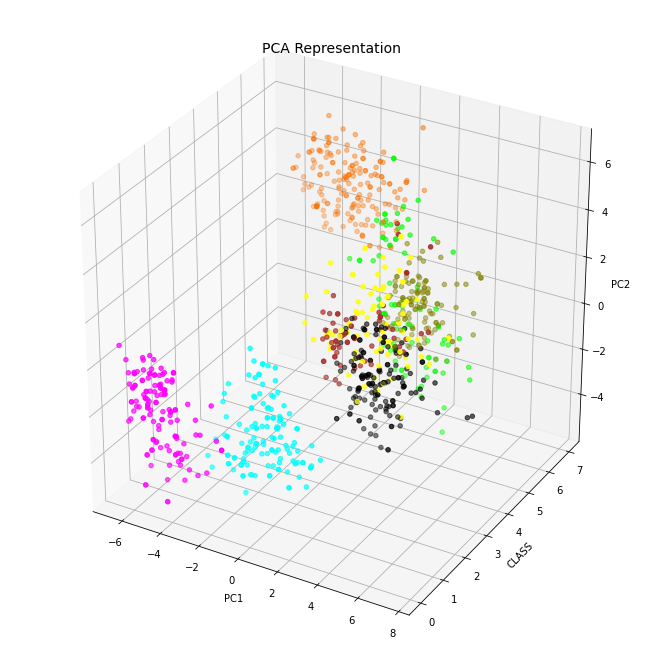

In [39]:
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_test) #X_test since the prediction of the K-means alg. was done on the test set

fig = plt.figure(figsize=(9,9))
axes = Axes3D(fig)
axes.set_title('PCA Representation', size=14)
axes.set_xlabel('PC1')
axes.set_ylabel('CLASS')
axes.set_zlabel('PC2')

#use dataframe to split the 2 principalComponents
DataVisualizationDF = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

colors = []
for c in y_predicted:
  if c == 0:#neutral
    colors.append('#FF00FF') #pink
  elif c == 1:#calm
    colors.append('#00FFFF') #cyan
  elif c == 2:#happy
    colors.append('#FFFF14') #yellow
  elif c == 3:#sad
    colors.append('#A52A2A') #brown
  elif c == 4:#angry
    colors.append('#000000') #black
  elif c == 5:#fearful
    colors.append('#00FF00') #green
  elif c == 6:#disgust
    colors.append('#808000') #olive
  elif c == 7:#surprised
    colors.append('#F97306') #orange

DataVisualizationDF['color'] = colors 

#I use the class predicted by the K-means algorithm as y, in this way the points should be visualized more near each other as the algorithm clustered them
axes.scatter(DataVisualizationDF['principal component 1'], y_predicted, DataVisualizationDF['principal component 2'], c = DataVisualizationDF['color']) 

#as expected the data is clustered, but the information about the classes it's not very important.

#0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors= 5) #value for k = 5
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#make predictions
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised

              precision    recall  f1-score   support

          01       0.42      0.86      0.56        56
          02       0.73      0.72      0.72       130
          03       0.67      0.68      0.68       137
          04       0.68      0.54      0.60       121
          05       0.71      0.69      0.70       125
          06       0.70      0.64      0.67       120
          07       0.87      0.63      0.73       136
          08       0.72      0.82      0.76       137

    accuracy                           0.69       962
   macro avg       0.69      0.70      0.68       962
weighted avg       0.71      0.69      0.69       962

[[ 48   7   1   0   0   0   0   0]
 [ 30  93   2   3   0   0   0   2]
 [  6   1  93   5   5  14   2  11]
 [ 14  13   9  65   2   6   3   9]
 [  2   6   7   2  86   2   5  15]
 [  3   4  13  14   9  77   0   0]
 [  7   3   6   5  16   6  86   7]
 [  5   0   7   2   3   5   3 112]]


# Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
#01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised

              precision    recall  f1-score   support

           1       0.72      0.82      0.77        56
           2       0.83      0.75      0.79       130
           3       0.85      0.82      0.84       137
           4       0.76      0.82      0.79       121
           5       0.88      0.81      0.84       125
           6       0.88      0.85      0.86       120
           7       0.73      0.72      0.73       136
           8       0.76      0.84      0.80       137

    accuracy                           0.80       962
   macro avg       0.80      0.80      0.80       962
weighted avg       0.81      0.80      0.80       962

[[ 46   0   2   6   0   0   2   0]
 [  8  98   4   8   0   2   2   8]
 [  2   4 113   2   0   2   6   8]
 [  0   8   0  99   0   0  10   4]
 [  2   2   4   2 101   4   8   2]
 [  0   2   4   4   6 102   2   0]
 [  2   0   4  10   8   0  98  14]
 [  4   4   2   0   0   6   6 115]]


In [ ]:
from sklearn import tree
text_representation = tree.export_text(dtree)
print(text_representation)
#text rappresentation of the tree

|--- feature_0 <= -0.39
|   |--- feature_0 <= -0.86
|   |   |--- feature_37 <= 0.83
|   |   |   |--- feature_9 <= 1.25
|   |   |   |   |--- feature_8 <= 0.79
|   |   |   |   |   |--- feature_27 <= -0.24
|   |   |   |   |   |   |--- feature_10 <= 0.90
|   |   |   |   |   |   |   |--- feature_32 <= -0.16
|   |   |   |   |   |   |   |   |--- feature_8 <= 0.67
|   |   |   |   |   |   |   |   |   |--- feature_10 <= 0.64
|   |   |   |   |   |   |   |   |   |   |--- feature_14 <= 0.69
|   |   |   |   |   |   |   |   |   |   |   |--- class: 04
|   |   |   |   |   |   |   |   |   |   |--- feature_14 >  0.69
|   |   |   |   |   |   |   |   |   |   |   |--- class: 02
|   |   |   |   |   |   |   |   |   |--- feature_10 >  0.64
|   |   |   |   |   |   |   |   |   |   |--- feature_27 <= -1.09
|   |   |   |   |   |   |   |   |   |   |   |--- class: 08
|   |   |   |   |   |   |   |   |   |   |--- feature_27 >  -1.09
|   |   |   |   |   |   |   |   |   |   |   |--- class: 05
|   |   |   |   |   |   |  

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rforest = RandomForestClassifier(criterion="gini", max_depth=10, max_features="log2", 
                                 max_leaf_nodes = 100, min_samples_leaf = 3, min_samples_split = 20, 
                                 n_estimators= 22000, random_state= 5)

In [ ]:
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', max_leaf_nodes=100,
                       min_samples_leaf=3, min_samples_split=20,
                       n_estimators=22000, random_state=5)

In [ ]:
predictions = rforest.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))
#01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised

              precision    recall  f1-score   support

           1       0.89      0.55      0.68        56
           2       0.70      0.94      0.80       130
           3       0.82      0.74      0.78       137
           4       0.75      0.70      0.73       121
           5       0.88      0.80      0.84       125
           6       0.78      0.79      0.79       120
           7       0.80      0.68      0.74       136
           8       0.71      0.85      0.77       137

    accuracy                           0.77       962
   macro avg       0.79      0.76      0.77       962
weighted avg       0.78      0.77      0.77       962



In [ ]:
#Hyperparameters tuning with gridSearch

#Define parameters to try out
parameters = {
'criterion' : ['gini', 'entropy'],
'max_leaf_nodes' : [100],
'max_features': ['log2'],
'max_depth': [10],
'min_samples_split': [15],
'min_samples_leaf': [5],
'n_estimators': [22000],
'random_state' : [5]
}

In [ ]:
#a hyperparameter is a parameter whose value is used to control the learning process.
#Tuning thos parameters
from sklearn.model_selection import GridSearchCV

grid_search_dt = GridSearchCV(estimator = rforest,
param_grid = parameters,
scoring = 'accuracy',
cv = 5,
verbose = 1)

grid_search_dt.fit(X_train, y_train)
print(grid_search_dt.best_estimator_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=100, min_samples_leaf=5,
                       min_samples_split=15, n_estimators=22000,
                       random_state=5)


"\nFitting 5 folds for each of 2 candidates, totalling 10 fits\nRandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',\n                       max_leaf_nodes=100, min_samples_leaf=5,\n                       min_samples_split=15, n_estimators=22000,\n                       random_state=5)\n"

In [ ]:
#Best model computed:
rforest = RandomForestClassifier(criterion="entropy", max_depth=10, max_features="log2", 
                                 max_leaf_nodes = 100, min_samples_leaf = 5, min_samples_split = 20, 
                                 n_estimators= 22000, random_state= 5)

rforest.fit(X_train, y_train)
predictions = rforest.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
#01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised

              precision    recall  f1-score   support

           1       0.90      0.66      0.76        56
           2       0.71      0.95      0.82       130
           3       0.87      0.77      0.81       137
           4       0.79      0.77      0.78       121
           5       0.88      0.84      0.86       125
           6       0.80      0.84      0.82       120
           7       0.86      0.68      0.76       136
           8       0.77      0.88      0.82       137

    accuracy                           0.81       962
   macro avg       0.82      0.80      0.80       962
weighted avg       0.82      0.81      0.81       962



## CNN

#### CNN MFCCs

In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2) 
x_testcnn = np.expand_dims(X_test, axis=2)

y_test = y_test.astype(np.float)
y_train = y_train.astype(np.float)

x_traincnn.shape, x_testcnn.shape 

((1951, 40, 1), (962, 40, 1))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
from tensorflow import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
#from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=(8)))
#hidden neurons = (#input neurons + #output neurons)/2
model.add(Conv1D(70, 5, padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

opt = keras.optimizers.RMSprop(learning_rate=0.0000580, rho=0.9, epsilon=None, decay=0.0) 

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 40, 128)           768       
                                                                 
 activation_12 (Activation)  (None, 40, 128)           0         
                                                                 
 dropout_8 (Dropout)         (None, 40, 128)           0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 5, 128)           0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 5, 70)             44870     
                                                                 
 activation_13 (Activation)  (None, 5, 70)             0         
                                                      

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=1100, validation_data=(x_testcnn, y_test)) 

Epoch 1/1100
122/122 [==============================] - 1s 7ms/step - loss: 2.2333 - accuracy: 0.1599 - val_loss: 2.1575 - val_accuracy: 0.2152
Epoch 2/1100
122/122 [==============================] - 1s 6ms/step - loss: 2.0949 - accuracy: 0.2076 - val_loss: 2.0625 - val_accuracy: 0.2214
Epoch 3/1100
122/122 [==============================] - 1s 6ms/step - loss: 2.0239 - accuracy: 0.2260 - val_loss: 2.0077 - val_accuracy: 0.2516
Epoch 4/1100
122/122 [==============================] - 1s 6ms/step - loss: 1.9762 - accuracy: 0.2435 - val_loss: 1.9681 - val_accuracy: 0.2568
Epoch 5/1100
122/122 [==============================] - 1s 6ms/step - loss: 1.9499 - accuracy: 0.2522 - val_loss: 1.9424 - val_accuracy: 0.2723
Epoch 6/1100
122/122 [==============================] - 1s 6ms/step - loss: 1.9341 - accuracy: 0.2553 - val_loss: 1.9203 - val_accuracy: 0.2786
Epoch 7/1100
122/122 [==============================] - 1s 6ms/step - loss: 1.9075 - accuracy: 0.2645 - val_loss: 1.9025 - val_accuracy:

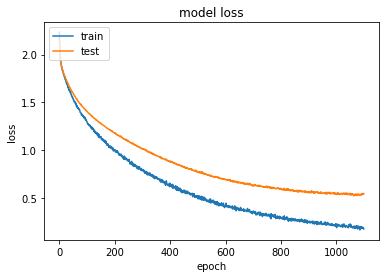

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

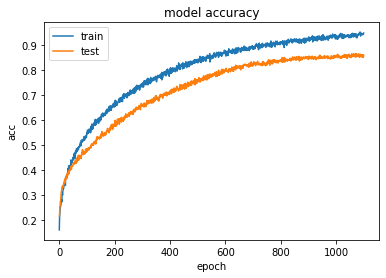

In [ ]:
#accuracy plot
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Save model
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = '/content/drive/My Drive/Ravdess_model'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/Ravdess_model/Emotion_Voice_Detection_Model.h5 


In [ ]:
#reload
loaded_model = keras.models.load_model('/content/drive/My Drive/Ravdess_model/Emotion_Voice_Detection_Model.h5')
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 40, 128)           768       
                                                                 
 activation_12 (Activation)  (None, 40, 128)           0         
                                                                 
 dropout_8 (Dropout)         (None, 40, 128)           0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 5, 128)           0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 5, 70)             44870     
                                                                 
 activation_13 (Activation)  (None, 5, 70)             0         
                                                      

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
pred = model.predict(x_testcnn) 
pred = np.argmax(pred, axis = 1)
y_test = np.array([int(x) for x in y_test])


print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
#01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised

              precision    recall  f1-score   support

           1       0.84      0.86      0.85        56
           2       0.90      0.92      0.91       130
           3       0.81      0.90      0.85       137
           4       0.82      0.81      0.82       121
           5       0.88      0.84      0.86       125
           6       0.82      0.83      0.83       120
           7       0.93      0.77      0.84       136
           8       0.86      0.91      0.88       137

    accuracy                           0.86       962
   macro avg       0.86      0.86      0.86       962
weighted avg       0.86      0.86      0.86       962

[[ 48   2   2   4   0   0   0   0]
 [  6 120   2   0   0   0   2   0]
 [  1   0 123   4   3   4   0   2]
 [  0   8   2  98   0   4   4   5]
 [  0   2   4   2 105   2   2   8]
 [  0   2   9   7   2 100   0   0]
 [  0   0   6   2   7  10 105   6]
 [  2   0   4   2   2   2   0 125]]


#### CNN MELSPECTOGRAMs

In [ ]:
import os
import pandas as pd
import glob 
import librosa
from librosa import display
import numpy as np

#EXTRACTING MELSPECTOGRAM INSTEAD OF MFCC, I'm using a CNN so the melspec should perform better
path = '/content/drive/MyDrive/ColabNotebooks/dataset'
lst = []

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        melSpectograms = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=40).T,axis=0)
        file = file[6:8] #extract features
        arr = melSpectograms, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue   


In [ ]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
from sklearn.model_selection import train_test_split
X, y = zip(*lst)

X = np.asarray(X)
y = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) #splitting for training and testing

In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2) 
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
y_test = y_test.astype(np.float)
y_train = y_train.astype(np.float)


In [ ]:
x_traincnn.shape, x_testcnn.shape #mels: ((1951, 20, 1), (962, 20, 1))

((1951, 40, 1), (962, 40, 1))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
from tensorflow import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(40,1)))
#hidden neurons = (#input neurons + #output neurons)/2
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(70, 5,padding='same',)) # era 128
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

opt = keras.optimizers.RMSprop(learning_rate=0.0000580, rho=0.9, epsilon=None, decay=0.0) 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 128)           768       
                                                                 
 activation (Activation)     (None, 40, 128)           0         
                                                                 
 dropout (Dropout)           (None, 40, 128)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 128)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 70)             44870     
                                                                 
 activation_1 (Activation)   (None, 5, 70)             0         
                                                        

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=1100, validation_data=(x_testcnn, y_test)) 
#Turns out I was supposed to make the labels integers and then have those integers correspond to a string label. 
#With this I have 0 to 13 for my integers and then an array of size 13 with string values.
#aaround 400 80%acc, 1000 -> 96% acc


Epoch 1/1100
122/122 [==============================] - 2s 9ms/step - loss: 2.2671 - accuracy: 0.1932 - val_loss: 2.2030 - val_accuracy: 0.1913
Epoch 2/1100
122/122 [==============================] - 1s 6ms/step - loss: 2.1697 - accuracy: 0.1943 - val_loss: 2.1532 - val_accuracy: 0.1985
Epoch 3/1100
122/122 [==============================] - 1s 6ms/step - loss: 2.1245 - accuracy: 0.2117 - val_loss: 2.1137 - val_accuracy: 0.2141
Epoch 4/1100
122/122 [==============================] - 1s 6ms/step - loss: 2.0791 - accuracy: 0.2127 - val_loss: 2.0652 - val_accuracy: 0.2235
Epoch 5/1100
122/122 [==============================] - 1s 6ms/step - loss: 2.0315 - accuracy: 0.2317 - val_loss: 2.0293 - val_accuracy: 0.2131
Epoch 6/1100
122/122 [==============================] - 1s 6ms/step - loss: 1.9977 - accuracy: 0.2153 - val_loss: 1.9814 - val_accuracy: 0.2131
Epoch 7/1100
122/122 [==============================] - 1s 6ms/step - loss: 1.9631 - accuracy: 0.2307 - val_loss: 1.9452 - val_accuracy:

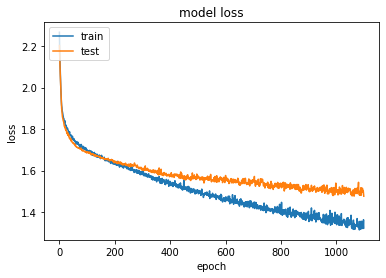

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

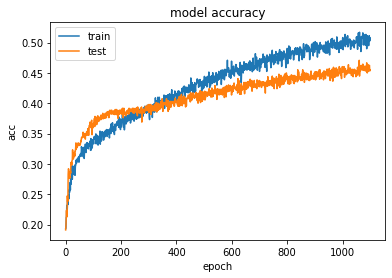

In [ ]:
#accuracy plot
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Save model
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = '/content/drive/My Drive/Ravdess_model'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/Ravdess_model/Emotion_Voice_Detection_Model.h5 


In [ ]:
#reload
loaded_model = keras.models.load_model('/content/drive/My Drive/Ravdess_model/Emotion_Voice_Detection_Model.h5')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 128)           768       
                                                                 
 activation (Activation)     (None, 40, 128)           0         
                                                                 
 dropout (Dropout)           (None, 40, 128)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 128)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 70)             44870     
                                                                 
 activation_1 (Activation)   (None, 5, 70)             0         
                                                        

In [ ]:
#check accuracy
from sklearn.metrics import classification_report,confusion_matrix
pred = model.predict(x_testcnn) 
pred = np.argmax(pred, axis = 1)
y_test = np.array([int(x) for x in y_test])


print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
#01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised

              precision    recall  f1-score   support

           1       0.07      0.02      0.03        56
           2       0.42      0.73      0.53       130
           3       0.51      0.43      0.47       137
           4       0.31      0.26      0.29       121
           5       0.76      0.66      0.70       125
           6       0.48      0.48      0.48       120
           7       0.32      0.27      0.29       136
           8       0.47      0.54      0.50       137

    accuracy                           0.46       962
   macro avg       0.42      0.42      0.41       962
weighted avg       0.44      0.46      0.44       962

[[ 1 22  8 13  0  2  9  1]
 [ 2 95  3 21  0  0  9  0]
 [ 0  5 59  9  6 22 16 20]
 [ 3 51  8 32  0  9  4 14]
 [ 0  4 11  0 82  5 11 12]
 [ 1 18  9  7  8 58  9 10]
 [ 3 25  7 14 10 13 37 27]
 [ 4  8 11  6  2 12 20 74]]


With melspectograms the same CNN model doesn't seem to perform better, the first CNN seem to be the best model by looking at the final results, also the random forest seem a robust classifier and doesn't require so much traning, meanwhile the CNN required cross-validation to solve the overfitting problem.
The decision tree might also be considered the best one, with an 80% accuracy and little computation/training behind it, might be one of the best if the model needs to be constantly trained, but also the performance of the tree might not increase much, meanwhile for the CNN with more data and more hyperparameters tuning the model might outperform by far the others, all these considerations must be taken into account when we need to use our models in an application or in a real-world context.
For example for an app on mobile if I keep needing to update the model and use it with little computation, than the decision tree should be the best for this puropose; if I will not need to train in again and just use it than the CNN wuold be the best, it all depends on the contexts

The Mfccs' CNN got little overfitting at first, to try to fix this I added some dropout and tried to decrease the number of epochs for the model to try to learn only the datas needed for generalization

The hyperparameters tuning was performed only with the random forest approach, but could be also be performed with the CNN to try to find a better combination of hyperparameters. The scope was to demonstrate a possible approach to try to gain better performances

Also the different models performed differently on the different classes, even if the overall accuracy of the calssifiers seems to be near 80, some models got better results with the class 'neutral' and others with the class angry and so on, so if I'll need to use a model that recoginze only angry people I might want to use a specific classifier over another that performs poorly on angry datas but better overall.